Regressione lineare con gradiente e sperimentazione per vari valori del coefficiente alpha
nel gradiente

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
plt.style.use('fivethirtyeight')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['lines.linewidth'] = 2

# definisce un vettore di colori
colors = ['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c', '#137e6d', '#be0119', '#3b638c', '#af6f09']

Funzione di normalizzazione delle feature a distribuzioni a media $0$ e varianza $1$

In [3]:
def normalizza(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0, ddof=1)
    return (X-mu)/sigma

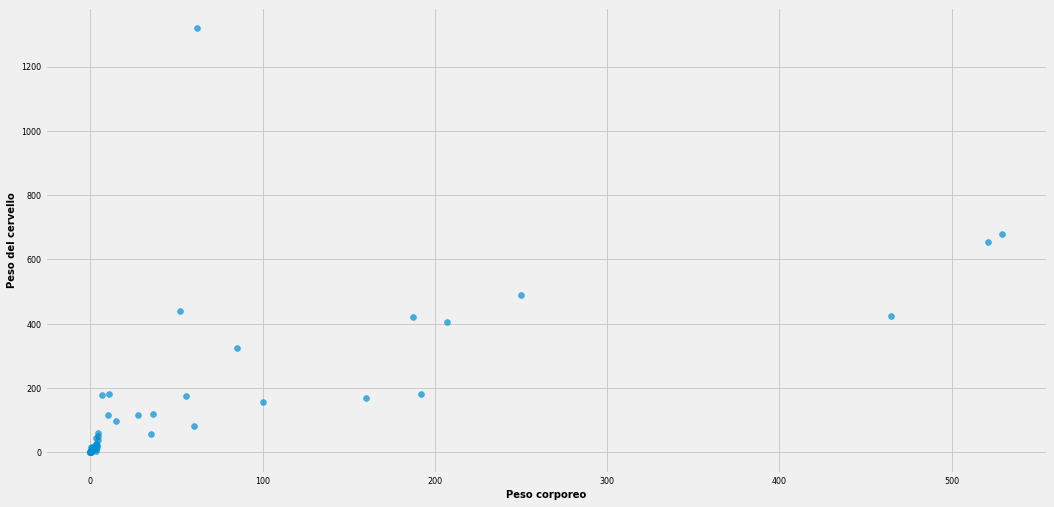

In [4]:
# legge i dati in dataframe pandas
data = pd.read_csv("../dataset/mammals.csv", delimiter=',')

# calcola dimensione dei dati
n = len(data)

# Estrae dal dataframe gli array X delle features e y dei valori
X, t = np.array(data[['body']]), np.array(data['brain']).reshape((-1,1))

# visualizza dati mediante scatter
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
ax.scatter(X, t, marker='o', alpha=.7)
plt.xlabel('Peso corporeo', fontsize=10)
plt.ylabel('Peso del cervello', fontsize=10)
plt.show()

In [5]:
X=normalizza(X)
X = np.column_stack((np.ones(n), X))

Mostra distribuzione dell'errore quadratico medio al variare dei coefficienti

In [6]:
# definisce la funzione da calcolare in ogni punto della griglia
def error(v1, v2):
    theta = np.array((v1, v2)).reshape(-1, 1)
    e=(np.dot(X,theta)-t)
    return np.dot(e.T,e)[0,0]/(2*n)

# insieme dei valori considerati per i coefficienti
w0_list = np.linspace(80, 160, 100)
w1_list = np.linspace(80, 160, 100)

# crea una griglia di coppie di valori 
w0, w1 = np.meshgrid(w0_list, w1_list)

# calcola errore per ogni punto della griglia
v_error=np.vectorize(error)
e=v_error(w0,w1).T

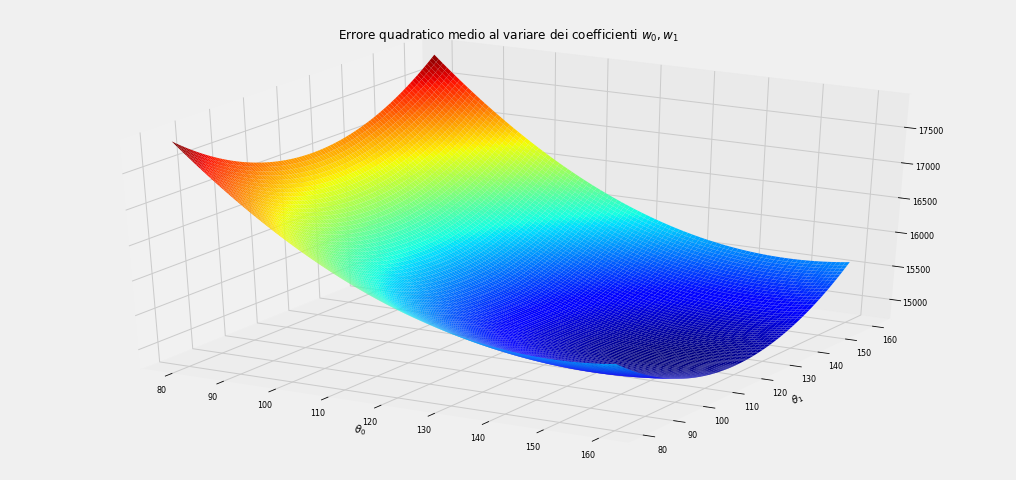

In [7]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca(projection='3d')
ax.plot_surface(w0, w1, e, rstride=1, cstride=1, cmap=plt.cm.jet , linewidth=0, antialiased=True)
ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)
ax.tick_params(axis='z', labelsize=8)
plt.xlabel(r"$\theta_0$", fontsize=10)
plt.ylabel(r"$\theta_1$", fontsize=10)
plt.title(r"Errore quadratico medio al variare dei coefficienti $w_0,w_1$", fontsize=12)
plt.show()

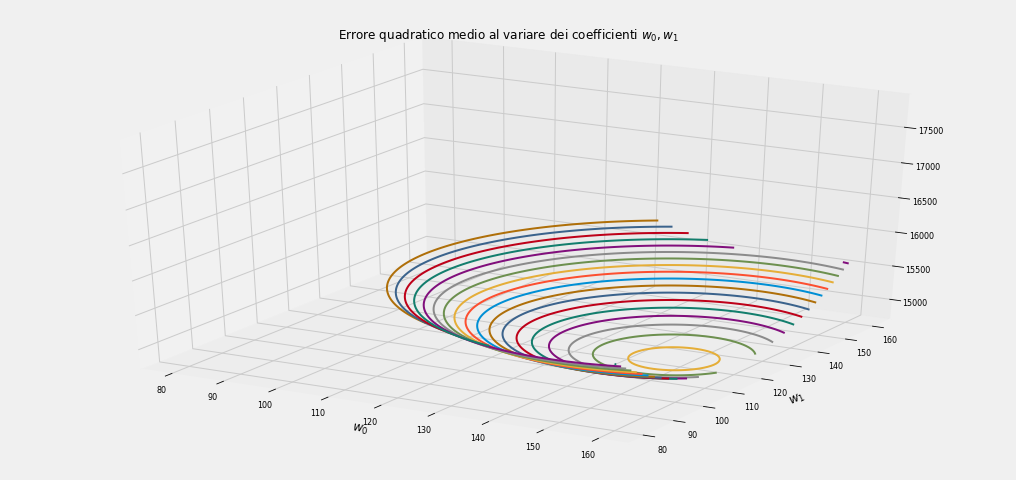

In [12]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca(projection='3d')
ax.contour(w0, w1, e, np.logspace(3.5,4.2,400), colors=colors)
ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)
ax.tick_params(axis='z', labelsize=8)
plt.xlabel(r"$w_0$", fontsize=12)
plt.ylabel(r"$w_1$", fontsize=12)
plt.title(r"Errore quadratico medio al variare dei coefficienti $w_0,w_1$", fontsize=12)
plt.show()

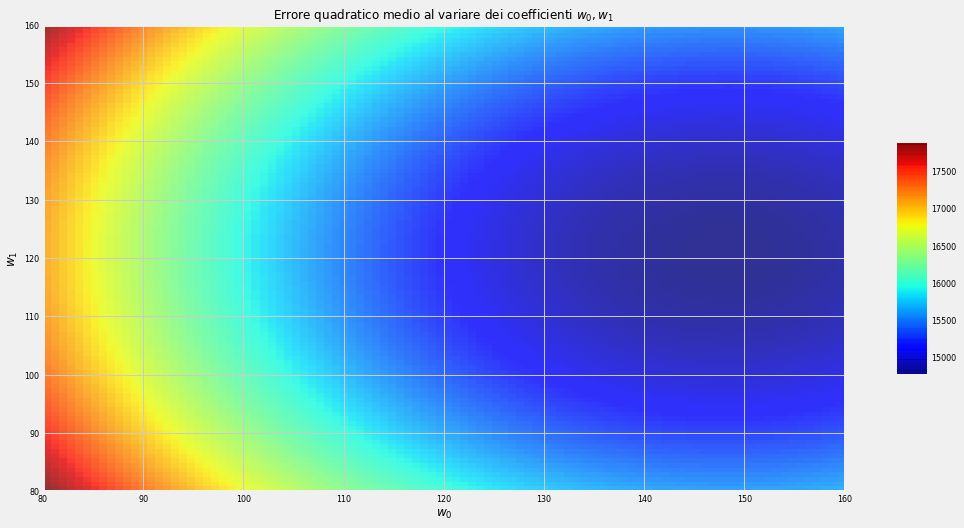

In [9]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
im = plt.imshow(e, origin='lower', extent=(w0_list.min(),w0_list.max(),w1_list.min(), w1_list.max()), aspect='auto',alpha=.8)
ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)
plt.xlabel(r"$w_0$", fontsize=12)
plt.ylabel(r"$w_1$", fontsize=12)
plt.title(r"Errore quadratico medio al variare dei coefficienti $w_0,w_1$", fontsize=12)
fig.colorbar(im, shrink=0.5, aspect=7, cmap=plt.cm.jet)
plt.show()

Funzione che effettua la discesa del gradiente, con memorizzazione del costo alle varie iterazioni

In [10]:
def gradiente( X, t, w_init, alpha, iterations, n):
    w = np.copy(w_init)
    costs = []
    for i in range(iterations):
        e=np.dot(X,w)-t
        c=np.dot(e.T,e)[0,0]/(2*n)
        dw=np.dot(X.T, e)/n
        w = w-alpha*dw
        costs.append(c)
    return costs, w

Regressione mediante discesa del gradiente

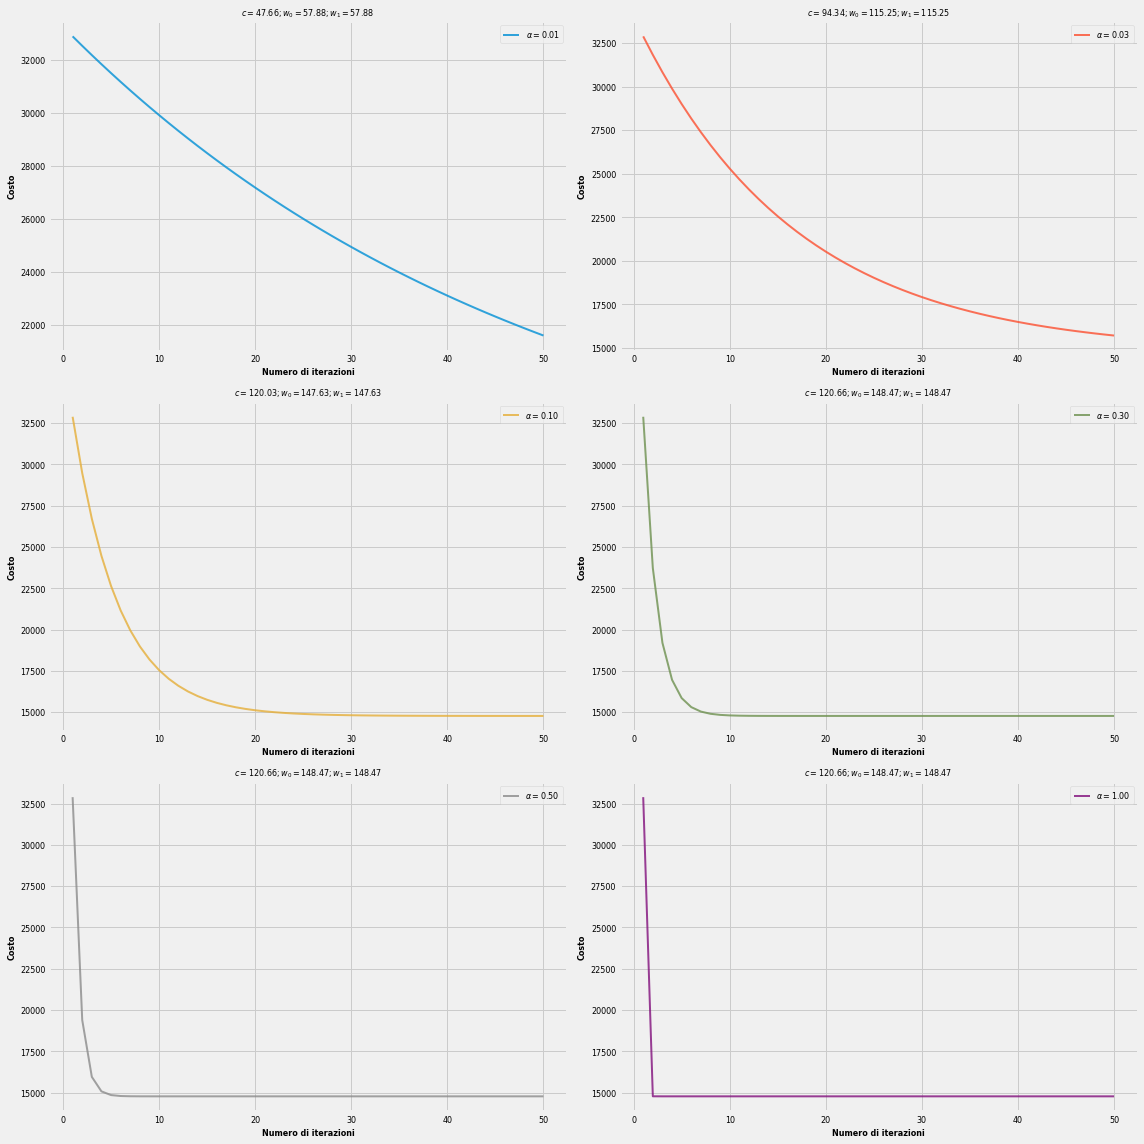

In [11]:
# Inizializza il vettore dei coefficienti
w_init = np.array([0, 0]).reshape(-1,1)
    
iterations = 50
alphas = [0.01, 0.03, 0.1, 0.3, 0.5, 1]

number_of_iterations = range(1, iterations + 1)

fig = plt.figure(figsize=(16,16))
for c,alpha in enumerate(alphas):
    costs, w = gradiente(X, t, w_init, alpha, iterations, n)
    ax = fig.add_subplot(3, 2, c+1)
    ax = fig.gca()
    ax.plot(number_of_iterations, costs, c= colors[c], alpha=.8, lw=2, label =r'$\alpha={0:3.2f}$'.format(alpha) )
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.xlabel(r'Numero di iterazioni', fontsize=8)
    plt.ylabel(r'Costo', fontsize=8)
    plt.legend(fontsize=8)
    plt.title(r'$c={1:6.2f}; w_0={2:8.2f}; w_1={2:8.2f}$'.format(round(costs[-1],3), round(w[0][0],2), round(w[1][0],2)), fontsize=8)
plt.tight_layout()
plt.show()